Dependencies

In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

Preprocessing

In [4]:
import pathlib

dirname = os.path.dirname(pathlib.Path().resolve())
# filename = "data\spotify_songs.csv"
filename = "data/spotify_songs.csv"
data = pd.read_csv(os.path.join(dirname, filename))

data.head()


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [6]:
data.nunique()

track_id                    28356
track_name                  23449
track_artist                10692
track_popularity              101
track_album_id              22545
track_album_name            19743
track_album_release_date     4530
playlist_name                 449
playlist_id                   471
playlist_genre                  6
playlist_subgenre              24
danceability                  822
energy                        952
key                            12
loudness                    10222
mode                            2
speechiness                  1270
acousticness                 3731
instrumentalness             4729
liveness                     1624
valence                      1362
tempo                       17684
duration_ms                 19785
dtype: int64

In [7]:
# TODO: bag of words for playlist name

In [8]:
data = data.drop(columns='track_name', axis = 1)
data = data.drop('track_album_name', axis = 1)
data = data.drop('playlist_name', axis = 1)

In [9]:
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

encoder = LabelEncoder()
data['playlist_genre'] = encoder.fit_transform(data['playlist_genre'])
data['playlist_subgenre'] = encoder.fit_transform(data['playlist_subgenre'])
data['track_artist'] = encoder.fit_transform(data['track_artist'])
data['track_id'] = encoder.fit_transform(data['track_id'])
data['track_album_id'] = encoder.fit_transform(data['track_album_id'])
data['playlist_id'] = encoder.fit_transform(data['playlist_id'])


today = datetime.fromisoformat('2023-12-31')
data['track_album_release_date'] = pd.to_datetime(data['track_album_release_date'], format='mixed')
data['age'] = (today - data['track_album_release_date']).apply(lambda x: x.days)
data = data.drop(columns='track_album_release_date', axis=1)


In [10]:
data.head()

,track_id,track_artist,track_popularity,track_album_id,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,age
0,24150,2782,66,8225,235,2,3,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,1661
1,3061,6084,67,17650,235,2,3,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,1479
2,7219,10416,70,3798,235,2,3,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,1640
3,25699,9215,60,5293,235,2,3,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,1626
4,5987,5402,69,21936,235,2,3,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,1762


In [11]:
from sklearn.model_selection import train_test_split

## Test data
train, test = train_test_split(data, test_size=0.15, random_state=42)

In [12]:
print(train.isna().any(axis=0))
print(train.isnull().any(axis=0))

track_id             False
track_artist         False
track_popularity     False
track_album_id       False
playlist_id          False
playlist_genre       False
playlist_subgenre    False
danceability         False
energy               False
key                  False
loudness             False
mode                 False
speechiness          False
acousticness         False
instrumentalness     False
liveness             False
valence              False
tempo                False
duration_ms          False
age                  False
dtype: bool
track_id             False
track_artist         False
track_popularity     False
track_album_id       False
playlist_id          False
playlist_genre       False
playlist_subgenre    False
danceability         False
energy               False
key                  False
loudness             False
mode                 False
speechiness          False
acousticness         False
instrumentalness     False
liveness             False
valence         

In [13]:
train.drop_duplicates(keep=False, inplace=True)
train.dropna()
print(train.columns[train.isna().any()].tolist())

[]


Number of 0 values in track_popularity:  2311


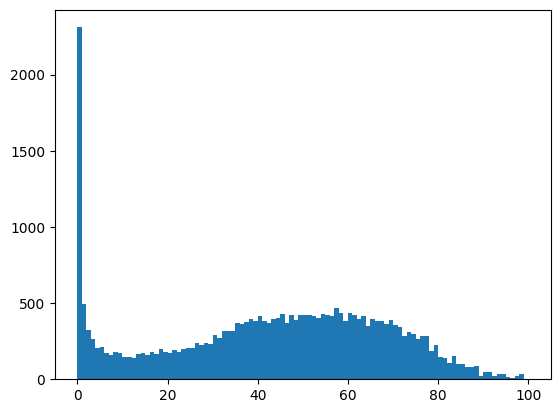

In [14]:
plt.hist(train["track_popularity"], bins= 100)
print("Number of 0 values in track_popularity: ", (train["track_popularity"] == 0).sum())

/Users/chrisizeh/Documents/TU/2023W/ML/ML-NN-Parameter-Search/.venv/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([-1.19732826, -1.18292552, -1.16852277, -1.15412003, -1.13971728,
        -1.12531454, -1.1109118 , -1.09650905, -1.08210631, -1.06770356,
        -1.05330082, -1.03889807, -1.02449533, -1.01009258, -0.99568984,
        -0.9812871 , -0.96688435, -0.95248161, -0.93807886, -0.92367612,
        -0.90927337, -0.89487063, -0.88046788, -0.86606514, -0.8516624 ,
        -0.83725965, -0.82285691, -0.80845416, -0.79405142, -0.77964867,
        -0.76524593, -0.75084319, -0.73644044, -0.7220377 , -0.70763495,
        -0.69323221, -0.67882946, -0.66

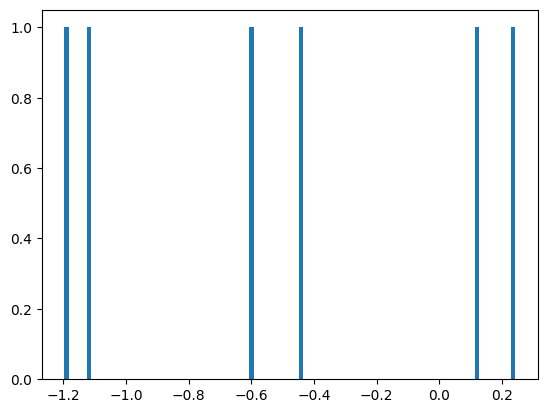

In [15]:
even = np.log(train["loudness"])
plt.hist(even, bins= 100)
#log transform makes no sense, because the data is not that skew

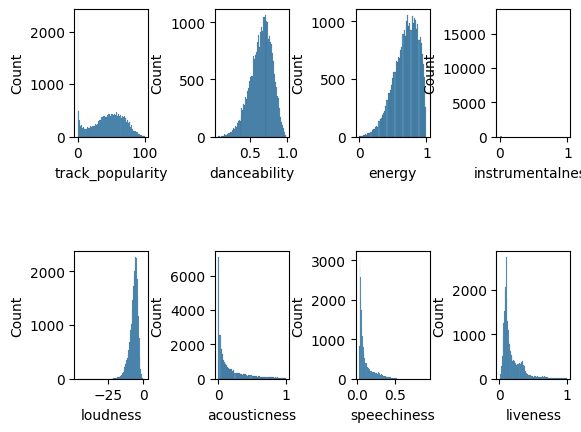

In [16]:
train["track_popularity"].max()
fig = plt.figure()
fig.subplots_adjust(hspace=0.9, wspace=0.9)
ax = fig.add_subplot(2, 4, 1)
sns.histplot(train["track_popularity"], bins = 100, ax=ax)
ax = fig.add_subplot(2, 4, 2)
sns.histplot(train["danceability"], ax=ax)
ax = fig.add_subplot(2, 4, 3)
sns.histplot(train["energy"],ax=ax)
ax = fig.add_subplot(2, 4, 4)
sns.histplot(train["instrumentalness"],ax=ax)
ax = fig.add_subplot(2, 4, 5)
sns.histplot(train["loudness"], bins = 100,ax=ax)
ax = fig.add_subplot(2, 4, 6)
sns.histplot(train["acousticness"], ax=ax)
ax = fig.add_subplot(2, 4, 7)
sns.histplot(train["speechiness"],ax=ax)
ax = fig.add_subplot(2, 4, 8)
sns.histplot(train["liveness"],ax=ax)
plt.show()

/Users/chrisizeh/Documents/TU/2023W/ML/ML-NN-Parameter-Search/.venv/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


9688

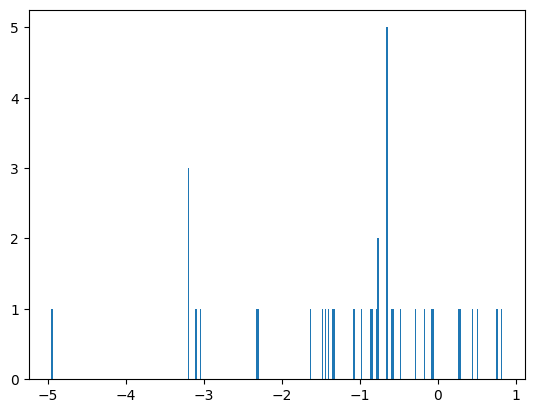

In [17]:
plt.hist(np.log1p(train['loudness']), bins= 300)
train["loudness"].nunique()


In [18]:

from sklearn.preprocessing import MinMaxScaler

sklearn.set_config(transform_output="pandas")
scaler = MinMaxScaler(feature_range=(0,1))
train = scaler.fit_transform(train)
test = scaler.fit_transform(test)

## Validation data
labels = train['danceability']
train = train.drop(columns='danceability', axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(train, labels, test_size=0.15, random_state=42)


Model

In [19]:
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert to 2D PyTorch tensors
def get_device():
    if torch.cuda.is_available():
        device = torch.device('cuda:0')
    else:
        device = torch.device('cpu')
    #print("using ", device)
    return device


device = get_device()

# convert a df to tensor to be used in pytorch
def dataframe_to_tensor(df):
    return torch.from_numpy(df.values).float().to(device)

X_train = dataframe_to_tensor(X_train)
y_train = dataframe_to_tensor(y_train)
X_valid = dataframe_to_tensor(X_valid)
y_valid = dataframe_to_tensor(y_valid)


y_test = test["danceability"]
X_test = test.drop(columns="danceability")
X_test = dataframe_to_tensor(X_test)
y_test = dataframe_to_tensor(y_test)


train_ds = TensorDataset(X_train, y_train)
valid_ds = TensorDataset(X_valid, y_valid)
test_ds = TensorDataset(X_test, y_test)

In [20]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(train_ds, batch_size=batch_size)
valid_dataloader = DataLoader(valid_ds, batch_size=batch_size)
test_dataloader = DataLoader(test_ds, batch_size=batch_size)

for XX, yy in train_dataloader:
    print(f"Shape of X [N, C, H, W]: {XX.shape}")
    print(f"Shape of y: {yy.shape} {yy.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 19])
Shape of y: torch.Size([64]) torch.float32


In [21]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(19, 50),
            nn.ReLU(),
            nn.Linear(50, 50),
            nn.ReLU(),
            nn.Linear(50, 1)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=19, out_features=50, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50, out_features=50, bias=True)
    (3): ReLU()
    (4): Linear(in_features=50, out_features=1, bias=True)
  )
)


In [22]:
#loss_fn = nn.CrossEntropyLoss()
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [23]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (XX, yy) in enumerate(dataloader):
        XX = XX.to(device).float()
        yy = yy.to(device).reshape((yy.shape[0], 1))

        # Compute prediction error
        pred = model(XX)
        loss = loss_fn(pred, yy)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(XX)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [24]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for XX, yy in dataloader:
            #XX, yy = XX.to(device), yy.to(device)
            XX = XX.to(device).float()
            yy = yy.to(device).reshape((yy.shape[0], 1))
            
            pred = model(XX)
            test_loss += loss_fn(pred, yy).item()
            
            #correct if the difference is < 10%
            abs_delta = np.abs(pred - yy)
            max_allow = np.abs(0.10 * yy)
            correct += (abs_delta < max_allow).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [25]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.486780  [   64/23721]
loss: 0.021797  [ 6464/23721]
loss: 0.022111  [12864/23721]
loss: 0.022681  [19264/23721]
Test Error: 
 Accuracy: 33.3%, Avg loss: 0.019733 

Epoch 2
-------------------------------
loss: 0.013504  [   64/23721]
loss: 0.017661  [ 6464/23721]
loss: 0.020173  [12864/23721]
loss: 0.021856  [19264/23721]
Test Error: 
 Accuracy: 33.8%, Avg loss: 0.019079 

Epoch 3
-------------------------------
loss: 0.012827  [   64/23721]
loss: 0.015869  [ 6464/23721]
loss: 0.020407  [12864/23721]
loss: 0.021677  [19264/23721]
Test Error: 
 Accuracy: 34.1%, Avg loss: 0.018802 

Epoch 4
-------------------------------
loss: 0.012851  [   64/23721]
loss: 0.015224  [ 6464/23721]
loss: 0.020503  [12864/23721]
loss: 0.021499  [19264/23721]
Test Error: 
 Accuracy: 34.0%, Avg loss: 0.018651 

Epoch 5
-------------------------------
loss: 0.012799  [   64/23721]
loss: 0.014862  [ 6464/23721]
loss: 0.020422  [12864/23721]
loss: 0.021352  [19264

In [26]:
#TODO: evaluation metrics as RMSE, Rsquare...

In [27]:
#TODO: cross validation

Parametric NN

In [28]:
%load_ext autoreload
%autoreload 1
import random

In [30]:
def acc_func(loc_pred, loc_y):
    abs_delta = np.abs(loc_pred - loc_y)
    max_allow = np.abs(0.10 * loc_y)
    return (abs_delta < max_allow).sum().item()

In [31]:
import NNModel

In [32]:
layer = [len(X_train[0]), 50, 50, 1]
nnmodel = NNModel.NNModel(layer, device, acc_func=acc_func, loss_func=nn.MSELoss, reshape=True)
dict_param = {"learning_rate": [0.1, 0.01, 0.05], "batch_size": [32, 64, 128]}
init_param = {"learning_rate": 0.01, "batch_size": 64}

nnmodel.grid_search(dict_param, train_ds, test_ds, epochs=5)
# nnmodel.local_search(init_param, train_ds, test_ds, epochs=1)

Parameter Combination (0.1, 32) with keys ['learning_rate', 'batch_size']
 Accuracy: 32.8

Parameter Combination (0.1, 64) with keys ['learning_rate', 'batch_size']
 Accuracy: 34.8

Parameter Combination (0.1, 128) with keys ['learning_rate', 'batch_size']
 Accuracy: 0.0

Parameter Combination (0.01, 32) with keys ['learning_rate', 'batch_size']
 Accuracy: 34.0

Parameter Combination (0.01, 64) with keys ['learning_rate', 'batch_size']
 Accuracy: 32.5

Parameter Combination (0.01, 128) with keys ['learning_rate', 'batch_size']
 Accuracy: 0.0

Parameter Combination (0.05, 32) with keys ['learning_rate', 'batch_size']
 Accuracy: 32.0

Parameter Combination (0.05, 64) with keys ['learning_rate', 'batch_size']
 Accuracy: 35.2

Parameter Combination (0.05, 128) with keys ['learning_rate', 'batch_size']
 Accuracy: 34.7



((0.05, 64), 35.24873096446701)